In [2]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
#download required nltk data files
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to C:\Users\RITI
[nltk_data]     RAI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\RITI
[nltk_data]     RAI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
def scrape_news_article(url):
    response = requests.get(url)#send requests to the new website
    if response.status_code != 200:
        print("failed to retrieve the webpage.")
        return ""

    soup= BeautifulSoup(response.text,'html.parser')#parse the html content
    paragraph=soup.find_all('p')#extract all paragraph tags
    article_text=' '.join([para.get_text()for para in paragraph])#combine all paragraph
    return article_text

In [6]:
def preprocess_text(text):
    """tokenize the text and remove stopwords"""
    word_tokens=word_tokenize(text)#tokenize the text into words
    stop_words= set(stopwords.words('english'))#load nltk's list of stopwords
#REMOVE STOP WORDS AND NON ALPHABETIC WORDS
    filtered_words=[word.lower()for word in word_tokens if word.isalpha()and word.lower() not in stop_words]
    return filtered_words
    

In [10]:
def extract_top_keywords(filtered_words,top_n=10):
    """extract the most common words from processed text"""
    word_freq=Counter(filtered_words)#count the words
    return word_freq.most_common(top_n)#return top 'n' most common word

In [14]:
def summarize_text(text,num_sentences=3):
    sentences=sent_tokenize(text)#tokenize into sentences
    return' '.join(sentences[:num_sentences])#return the first'num_sentences'sentences

In [18]:
def plot_word_frequencies(word_freq):
    """plot the frequency of top words as a bar chart."""
    words,counts= zip(*word_freq)#extract words and their counts
    plt.figure(figsize=(10,5))
    plt.bar(words,counts,color='blue')
    plt.xlabel('words')
    plt.ylabel('frequency')
    plt.title('top frequenciesin new article')
    plt.xticks(rotation=45)
    plt.show()


Original Article summmary
 Waqf amendment bill आज लोकसभा में पेश किया जा रहा है. नरेंद्र मोदी सरकार इस बिल को आज लोकसभा पास कराना चाहती है. बिल के प्रावधानों पर विस्तार से विचार किए बिने कई मुस्लिम संगठन आधारहीन आशंकाएं जता रहे हैं... 'हमारी पार्टी वक्फ बिल का विरोध करेगी', बोले सपा नेता रामगोपाल यादव बैटमैन का किरदार निभाने वाली हॉलीवुड अभिनेता वैल किल्मर का निधन गाजियाबाद में BJP और RSS की समन्वय बैठक आज, CM योगी आदित्यनाथ होंगे शामिल महाराष्ट्र के बुलढाणा जिले में सड़क हादसा, 5 लोगों की मौत उत्तराखंड सरकार ने सायरा बानो को बनाया राज्य महिला आयोग का उपाध्यक्ष अमेरिका ने ईरान के UAV, बैलिस्टिक मिसाइल कार्यक्रमों पर लगाया बैन ब्रिटेन ने यूरोपीय पर्यटकों के लिए बदले नियम, अब एंट्री से पहले लेना होगा ई-परमिट गुरुग्राम के इंडस्ट्रियल एरिया के गोदाम में भयानक आग, अन्य जिलों से मंगाई गई दमकल गाड़ियां अमेरिका में टिकटॉक बैन की समय सीमा करीब, ट्रंप आज अंतिम प्रस्ताव पर करेंगे समीक्षा हरियाणा में महंगी हुई बिजली, HERC ने 2025-26 के लिए टैरिफ बढ़ाया, दरों में 20 पैसे तक की वृद्धि IPS काम्या मि

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2346 (\N{DEVANAGARI LETTER PA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2360 (\N{DEVANAGARI LETTER SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\si

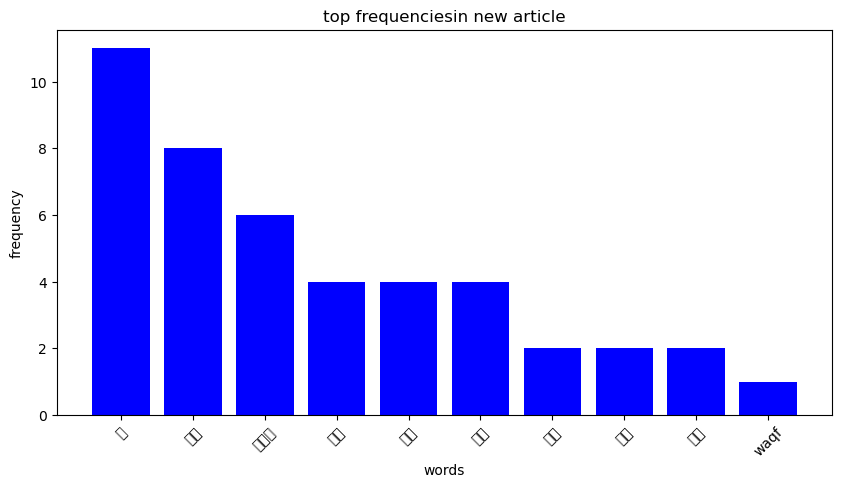

In [20]:
#example new articles url(change this toa real news url)
news_url="https://www.aajtak.in/"
article_text=scrape_news_article(news_url)

if article_text:
    print("\nOriginal Article summmary")
    print(summarize_text(article_text))#print the article summary

    filtered_words=preprocess_text(article_text)#process text
    top_keywords=extract_top_keywords(filtered_words)#extract keywords

    print("\nMost common keywords:")
    print(top_keywords)#Display most frequent words

    plot_word_frequencies(top_keywords)#Visualize word frequencies
else:
    print("no text extracted")
